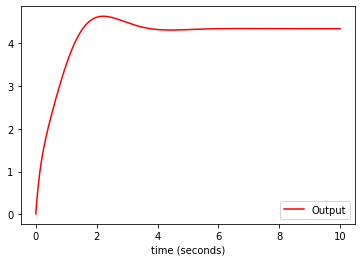

4.333249828791729


In [2]:
import sys
sys.path.append("../")
import time

from lib.data.dataplot import *
from lib.utils.time import *

class G1:
    
    def __init__(self):
        self.x1 = 0
        self.x2 = 0
        
    def evaluate(self, delta_t, _input):
        new_x2 = self.x2 - 2 * delta_t * self.x2 - 3 * delta_t * self.x1 + 8 * delta_t * _input
        new_x1 = self.x1 + delta_t * self.x2
        
        self.x1 = new_x1
        self.x2 = new_x2
        
        return self.x1
        

class G2:

    def __init__(self):
        self.y = 0

    def evaluate(self, delta_t, _input):
        self.y = self.y - 6 * delta_t * self.y + 10 * _input * delta_t
        return self.y
    

class CompoundSystem:
    
    def __init__(self):
        self.g1 = G1()
        self.g2 = G2()
        
    def evaluate(self, delta_t, _input):
        out_g1 = self.g1.evaluate(delta_t, _input)
        out_g2 = self.g2.evaluate(delta_t, _input)
        return out_g1 + out_g2

dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("out", "Output")

s = CompoundSystem()
u = 1

t = Time()
t.start()
while t.get() < 10:

    time.sleep(0.001)
    delta_t = t.elapsed()
    
    y = s.evaluate(delta_t, u)
    
    dp.append_x(t.get())
    dp.append_y("out", y)

dp.plot()
print(y)

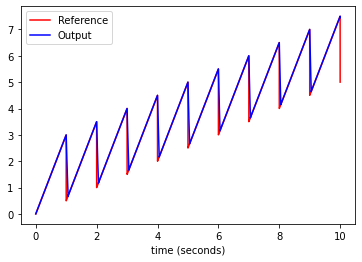

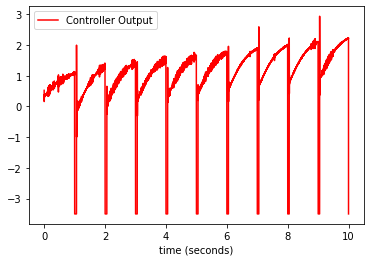

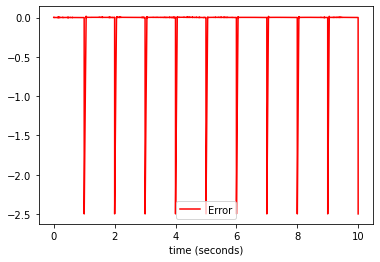

In [17]:
sys.path.append("../")

from lib.system.basic import *

class PIController:
    
    def __init__(self, _kp, _ki, _sat):
        self.P = Proportional(_kp)
        self.I = Integrator()
        self.ki = _ki
        self.saturation = _sat
        self.in_saturation = False
        
    def evaluate(self, delta_t, error):
        out = self.P.evaluate(delta_t, error)
        if not(self.in_saturation):
            out += self.ki * self.I.evaluate(delta_t, error)
        else:
            out += self.ki * self.I.prev_output
            
        if out > self.saturation:
            out = self.saturation
            self.in_saturation = True
        elif out < -self.saturation:
            out = -self.saturation
            self.in_saturation = True
        else:
            self.in_saturation = False
            
        return out


dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("ref", "Reference")
dp.add_y("out", "Output")

dp2 = DataPlotter()
dp2.set_x("time (seconds)")
dp2.add_y("out", "Controller Output")

dp3 = DataPlotter()
dp3.set_x("time (seconds)")
dp3.add_y("err", "Error")

s = CompoundSystem()
controller = PIController(150.0, 500.0, 3.5)

t = Time()
t.start()
y = 0

while t.get() < 10:

    time.sleep(0.001)
    delta_t = t.elapsed()
    
    u = 3 * t.get() - 2.5 * int(t.get())
    
    error = u - y
    out_controller = controller.evaluate(delta_t, error)
    y = s.evaluate(delta_t, out_controller)
   
    dp.append_x(t.get())
    dp.append_y("ref", u)
    dp.append_y("out", y)

    dp2.append_x(t.get())
    dp2.append_y("out", out_controller)
    
    dp3.append_x(t.get())
    dp3.append_y("err", error)


dp.plot()
dp2.plot()
dp3.plot()
